# Sort CTD metadata by date
Created by Ivan Lima on Mon Nov 29 2021 14:10:27 -0500

We sort the CTD metadata by date before extracting the satellite data at the CTD cast locations and dates.

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(context='paper', style='ticks', palette='tab10',
              rc={'figure.dpi':100, 'figure.figsize':[5, 5], 'axes.grid':True})

In [2]:
# df = pd.read_csv('data/CombinedCTD_metadata.csv')
df = pd.read_csv('data/CombinedCTD_metadata_bathy_600m.csv')
df = df[df.DD!=0]     # remove record with day=0
df = df[df.mbathy<-5] # remove land/shallow points
df = df.rename(columns={'CastID':'Cast', 'Lat':'Latitude', 'Lon':'Longitude',
                        'YYYY':'Year', 'MM':'Month', 'DD':'Day', 'mbathy':'bottom_depth'}) # rename columns
df['bottom_depth'] = df.bottom_depth.abs() # convert bottom depth to absolute values
df['Date'] = pd.to_datetime(df[['Year','Month','Day']]) # create Date column

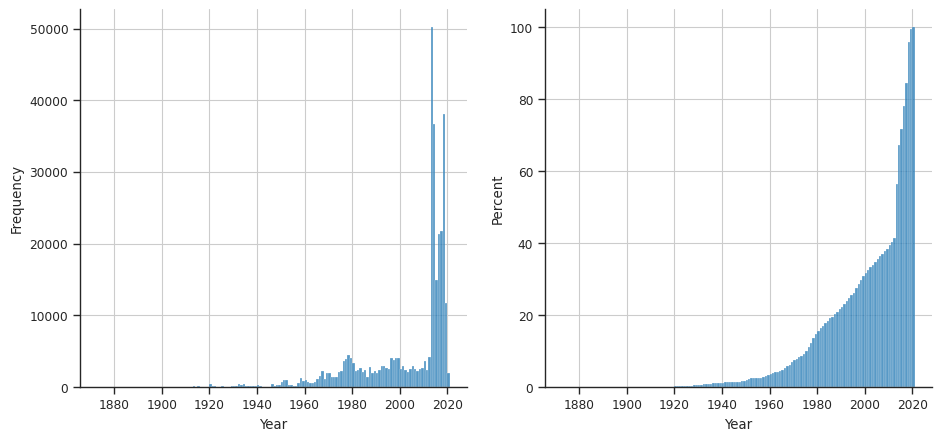

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(11,5))
_ = sns.histplot(data=df, x='Year', binwidth=1, stat='frequency', ax=axs[0])
_ = sns.histplot(data=df, x='Year', binwidth=1, cumulative=True, stat='percent', ax=axs[1])
sns.despine(fig)

In [4]:
df_out = df.sort_values('Date').reset_index(drop=True)
df_out.to_csv('data/CombinedCTD_metadata_bathy_600m_sorted.csv')

In [5]:
# import hvplot.pandas
# df = df[df.mbathy<-5]
# df.hvplot.points('Longitude', 'Latitude', geo=True, color='red', marker='x', coastline=True, tiles='EsriTerrain',
#                  frame_width=400)